In [101]:
import yfinance as yf 

In [102]:
ticker = yf.Ticker("TSLA")
ticker = ticker.history(period="max")

In [103]:
ticker.index

DatetimeIndex(['2010-06-29 00:00:00-04:00', '2010-06-30 00:00:00-04:00',
               '2010-07-01 00:00:00-04:00', '2010-07-02 00:00:00-04:00',
               '2010-07-06 00:00:00-04:00', '2010-07-07 00:00:00-04:00',
               '2010-07-08 00:00:00-04:00', '2010-07-09 00:00:00-04:00',
               '2010-07-12 00:00:00-04:00', '2010-07-13 00:00:00-04:00',
               ...
               '2024-03-15 00:00:00-04:00', '2024-03-18 00:00:00-04:00',
               '2024-03-19 00:00:00-04:00', '2024-03-20 00:00:00-04:00',
               '2024-03-21 00:00:00-04:00', '2024-03-22 00:00:00-04:00',
               '2024-03-25 00:00:00-04:00', '2024-03-26 00:00:00-04:00',
               '2024-03-27 00:00:00-04:00', '2024-03-28 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=3461, freq=None)

<Axes: xlabel='Date'>

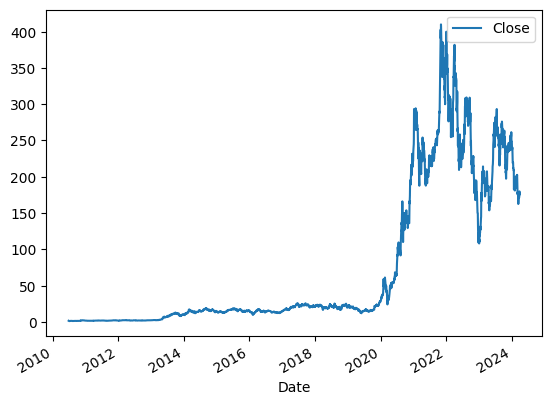

In [104]:
ticker.plot.line(y="Close", use_index=True)

In [105]:
del ticker["Dividends"]
del ticker["Stock Splits"]

In [106]:
ticker["Tomorrow"] = ticker["Close"].shift(-1)

In [107]:
ticker["Target"] = (ticker["Tomorrow"] > ticker["Close"]).astype(int)
ticker

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667,0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000,0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000,0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000,0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333,0
...,...,...,...,...,...,...,...
2024-03-22 00:00:00-04:00,166.690002,171.199997,166.300003,170.830002,75454700,172.630005,1
2024-03-25 00:00:00-04:00,168.759995,175.240005,168.729996,172.630005,74228600,177.669998,1
2024-03-26 00:00:00-04:00,178.580002,184.250000,177.380005,177.669998,113186200,179.830002,1


In [108]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = ticker.iloc[:-100]
test = ticker.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [109]:
from sklearn.metrics import precision_score
import pandas as pd 
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5490196078431373

<Axes: xlabel='Date'>

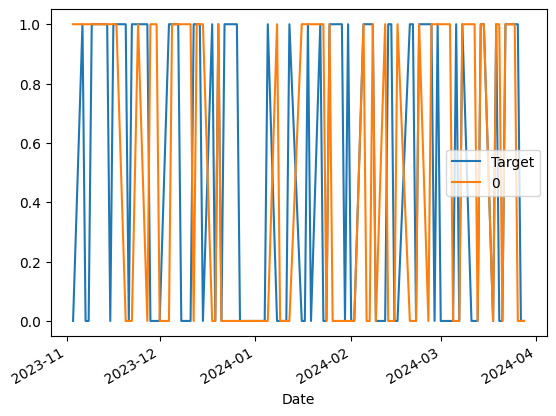

In [112]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [113]:
def predict(train, test, predictors, model): 
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds. pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [114]:
def backtest(data, model, predictors, start=2500, step=250):
    all_prediction = []
    for i in range(start, data.shape[0], step):
        
    return 
    

IndentationError: expected an indented block after 'for' statement on line 3 (3404192643.py, line 5)